# Multivariate Polynomial Regression – Marketing Mix Modeling

## Objective
This notebook implements **Multivariate Polynomial Regression** to understand how:
- TV Advertising Spend
- Radio Advertising Spend
- Newspaper Advertising Spend

collectively and **non‑linearly** influence Sales.

The notebook includes:
- Polynomial transformation of multi-features
- Interaction effects analysis
- Model comparison
- Evaluation metrics
- Residual & reliability diagnostics
- Business interpretation


## 1️⃣ Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

plt.style.use('seaborn-v0_8')

## 2️⃣ Load Dataset
Dataset must include:
TV | Radio | Newspaper | Sales

In [2]:
os.getcwd()
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 3️⃣ Exploratory Understanding

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


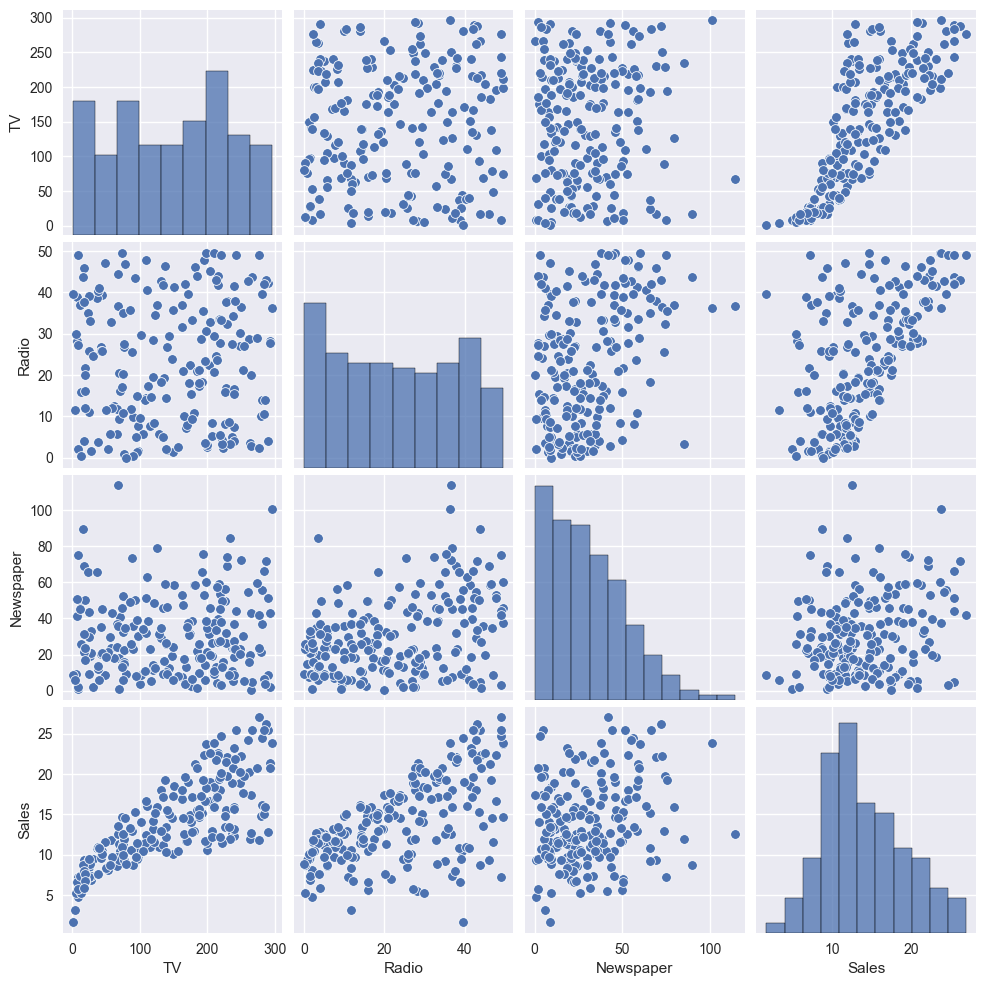

In [4]:
sns.pairplot(df[['TV','Radio','Newspaper','Sales']]);

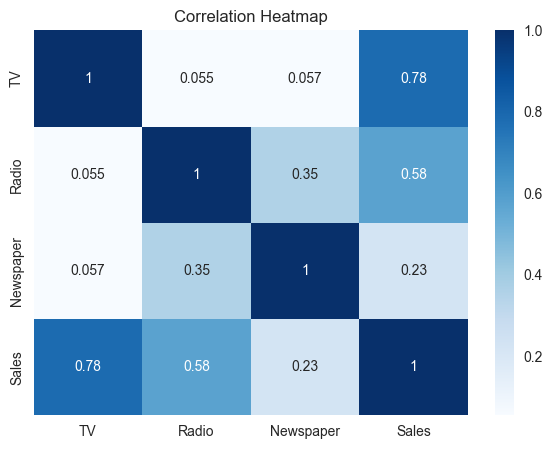

In [5]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## 4️⃣ Train / Test Split

In [6]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 5️⃣ Polynomial Feature Transformation (Degree 2 & 3)

In [7]:
def run_poly(degree):
    poly=PolynomialFeatures(degree=degree,include_bias=False)
    Xtr=poly.fit_transform(X_train)
    Xts=poly.transform(X_test)
    model=LinearRegression().fit(Xtr,y_train)
    y_pred=model.predict(Xts)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    return model,poly,r2,rmse,mae

results={}
for d in [1,2,3]:
    model,poly,r2,rmse,mae=run_poly(d)
    results[d]={"model":model,"poly":poly,"r2":r2,"rmse":rmse,"mae":mae}

results

{1: {'model': LinearRegression(),
  'poly': PolynomialFeatures(degree=1, include_bias=False),
  'r2': 0.899438024100912,
  'rmse': 1.7815996615334502,
  'mae': 1.4607567168117601},
 2: {'model': LinearRegression(),
  'poly': PolynomialFeatures(include_bias=False),
  'r2': 0.9869181490609604,
  'rmse': 0.6425809120553618,
  'mae': 0.5261794444043822},
 3: {'model': LinearRegression(),
  'poly': PolynomialFeatures(degree=3, include_bias=False),
  'r2': 0.9906674629182922,
  'rmse': 0.5427415675105737,
  'mae': 0.38868170487275855}}

## 6️⃣ Performance Comparison

In [8]:
perf=pd.DataFrame({
 'Degree':[1,2,3],
 'R2':[results[d]['r2'] for d in results],
 'RMSE':[results[d]['rmse'] for d in results],
 'MAE':[results[d]['mae'] for d in results]
})
perf

,Degree,R2,RMSE,MAE
0,1,0.899438,1.781600,1.460757
1,2,0.986918,0.642581,0.526179
2,3,0.990667,0.542742,0.388682


## 7️⃣ Select Best Performing Model

In [9]:
best=max(results,key=lambda d:results[d]['r2'])
best

3

## 8️⃣ Residual Diagnostics

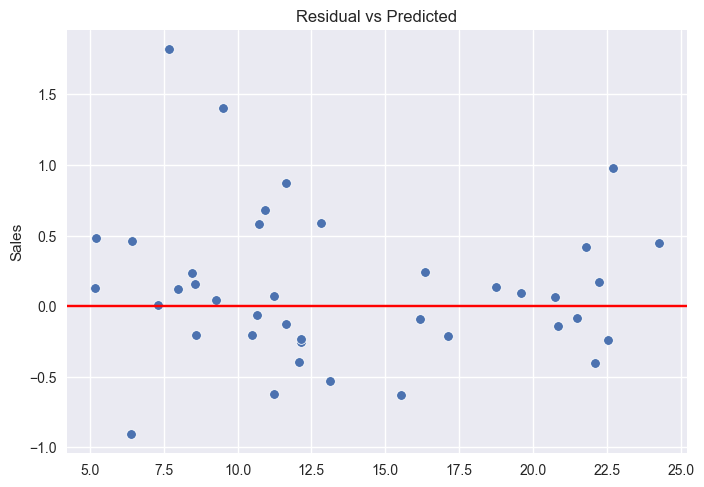

In [10]:
poly=results[best]['poly']
Xtr=poly.fit_transform(X_train)
Xts=poly.transform(X_test)
best_model=LinearRegression().fit(Xtr,y_train)
y_pred=best_model.predict(Xts)
res=y_test-y_pred

sns.scatterplot(x=y_pred,y=res)
plt.axhline(0,color='red')
plt.title('Residual vs Predicted')
plt.show()

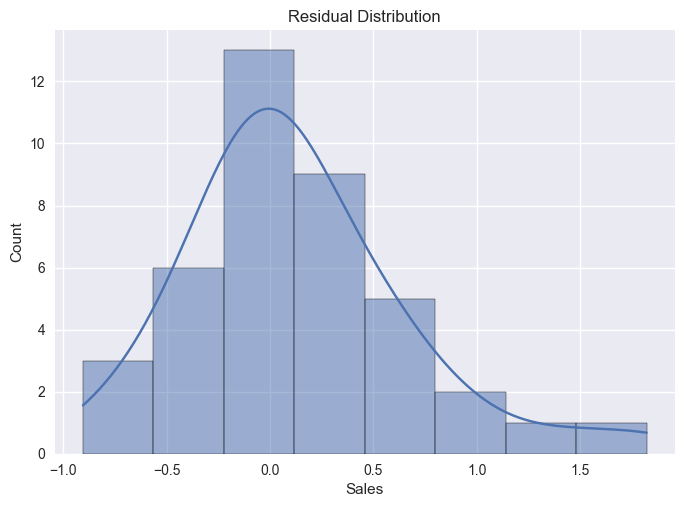

In [11]:
sns.histplot(res,kde=True)
plt.title('Residual Distribution')
plt.show()

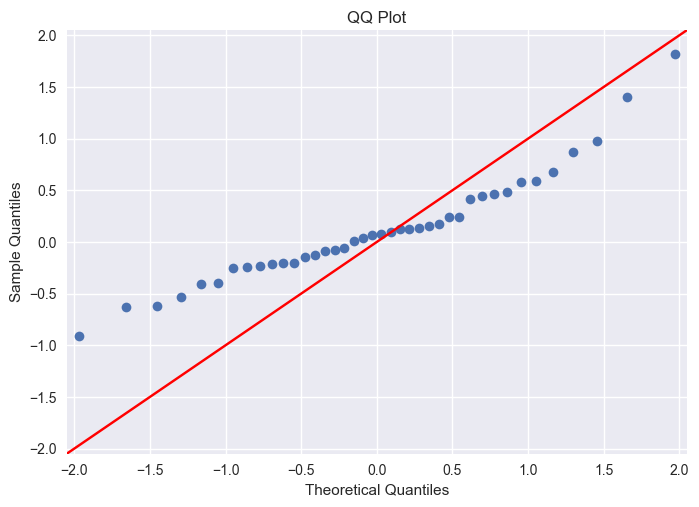

In [12]:
sm.qqplot(res,line='45')
plt.title('QQ Plot')
plt.show()

## 💼 Business Interpretation
- Models **non-linear behavior** of each channel
- Captures **interaction effects** (TV × Radio etc.)
- Identifies **diminishing returns**
- Demonstrates **combined channel synergy**
- Produces more realistic marketing performance intelligence
